**Analisis Implementasi Transformer**

## 1. Aplikasi atau Kasus Penggunaan
* Model ini digunakan untuk menerjemahkan bahasa daerah ke bahasa Indonesia.

* Dataset terdiri dari pasangan kalimat dalam bahasa daerah dan terjemahannya dalam bahasa Indonesia.

* Implementasi ini dapat digunakan dalam aplikasi penerjemahan otomatis atau sebagai bagian dari asisten bahasa berbasis AI.

* Dapat membantu dalam pelestarian bahasa daerah dengan menyediakan model AI yang mampu memahami dan menerjemahkan bahasa tersebut.

In [103]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding, MultiHeadAttention, LayerNormalization, Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
dataset = [
    ("<start> Kombai <end>", "<start> Apa kabar? <end>"),
    ("<start> Manta'de <end>", "<start> Baik-baik saja <end>"),
    ("<start> Pa'tabe' <end>", "<start> Permisi <end>"),
    ("<start> Tammu' langi' <end>", "<start> Selamat pagi <end>"),
    ("<start> Kumande'ko? <end>", "<start> Apakah kamu sudah makan? <end>"),
    ("<start> Umbain? <end>", "<start> Apa itu? <end>"),
    ("<start> Sule? <end>", "<start> Di mana? <end>"),
    ("<start> Narombo? <end>", "<start> Kenapa? <end>"),
    ("<start> Indan muane? <end>", "<start> Siapa laki-laki itu? <end>"),
    ("<start> Indan baine? <end>", "<start> Siapa perempuan itu? <end>"),
    ("<start> Umba' ko? <end>", "<start> Kamu dari mana? <end>"),
    ("<start> Tammu' ko? <end>", "<start> Apakah kamu baik-baik saja? <end>"),
    ("<start> Sikamali' <end>", "<start> Terima kasih <end>"),
    ("<start> Mangrara banua <end>", "<start> Membangun rumah <end>"),
    ("<start> Pumate' <end>", "<start> Meninggal <end>"),
    ("<start> Malleke' <end>", "<start> Pergi <end>"),
    ("<start> Manapa'ko? <end>", "<start> Apa yang kamu lakukan? <end>"),
    ("<start> Bassi'ka <end>", "<start> Hujan <end>"),
    ("<start> Tallangko' <end>", "<start> Jatuh <end>"),
    ("<start> Allo tau? <end>", "<start> Hari ini apa? <end>"),
    ("<start> Kema'na ko? <end>", "<start> Kamu mau ke mana? <end>"),
    ("<start> Tabe' <end>", "<start> Maaf <end>"),
    ("<start> Tammu' to dolo' <end>", "<start> Orang dulu bilang <end>"),
    ("<start> Kema'na inai? <end>", "<start> Ibunya ke mana? <end>"),
    ("<start> Nasang tani' <end>", "<start> Tidak tahu <end>"),
    ("<start> Umbai'na mako? <end>", "<start> Apa yang dia katakan? <end>"),
    ("<start> Na'ala tu? <end>", "<start> Sudah diambil? <end>"),
    ("<start> Tammu' rara <end>", "<start> Selamat sore <end>"),
    ("<start> Nai' to dolota' <end>", "<start> Ini cerita orang tua <end>"),
    ("<start> Kema'na sangngambu? <end>", "<start> Ke mana anak kecil itu? <end>"),
    ("<start> Pa'rapo <end>", "<start> Menunggu <end>"),
    ("<start> Na'bangka <end>", "<start> Meninggalkan sesuatu <end>"),
    ("<start> Umbai' sangpuru' <end>", "<start> Di mana tempat sembahyang? <end>"),
    ("<start> Tamali'ko? <end>", "<start> Bagaimana kabarmu? <end>"),
    ("<start> Umbai' untu' mu? <end>", "<start> Di mana gigimu? <end>"),
    ("<start> Unni' tau untu' <end>", "<start> Anak yang kehilangan gigi <end>"),
    ("<start> Bangko' duka'na? <end>", "<start> Kenapa kamu sedih? <end>"),
    ("<start> Ledo'? <end>", "<start> Lapar? <end>"),
    ("<start> Uru'na sala <end>", "<start> Kesalahan pertama <end>"),
    ("<start> Nasang tau <end>", "<start> Tidak ada orang <end>"),
    ("<start> Tallangko' sangka' <end>", "<start> Jatuh ke bawah <end>"),
    ("<start> Masambo <end>", "<start> Beristirahat <end>"),
    ("<start> Ira' lisu'? <end>", "<start> Kapan kamu pulang? <end>"),
    ("<start> Pa'pada <end>", "<start> Sama-sama <end>"),
    ("<start> Makka' biang <end>", "<start> Menyapu halaman <end>"),
    ("<start> Tamali' allo <end>", "<start> Hari ini cerah <end>"),
    ("<start> Na'mu kalua? <end>", "<start> Sudah selesai? <end>"),
    ("<start> Tallang sang rampa' <end>", "<start> Jatuh di depan <end>"),
    ("<start> Bangko' lako' <end>", "<start> Mau pergi ke mana? <end>"),
    ("<start> Tammu' tallu <end>", "<start> Tiga orang berkumpul <end>")
]

2. Komponen-Komponen Penting Transformer

a) Embedding Layer

Mengubah token input menjadi representasi vektor dalam dimensi tinggi.

b) Positional Encoding

Menambahkan informasi urutan ke dalam embedding.

Menggunakan fungsi sinus dan cosinus untuk menangkap informasi posisi dalam sekuens data.

c) Multi-Head Attention

Memungkinkan model untuk fokus pada berbagai bagian dari input secara simultan.

Kombinasi dari beberapa mekanisme perhatian untuk meningkatkan pemahaman konteks.

d) Feed Forward Neural Network (FFN)

Lapisan non-linear yang membantu dalam transformasi representasi data.

e) Layer Normalization dan Dropout

Layer Normalization meningkatkan stabilitas pelatihan.

Dropout digunakan untuk mengurangi overfitting.

In [104]:
# 🔹 Tokenisasi Data
input_texts, target_texts = zip(*dataset)

input_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
target_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')

input_tokenizer.fit_on_texts(input_texts)
target_tokenizer.fit_on_texts(target_texts)

input_sequences = input_tokenizer.texts_to_sequences(input_texts)
target_sequences = target_tokenizer.texts_to_sequences(target_texts)

max_length = max(len(seq) for seq in input_sequences)
input_sequences = tf.keras.preprocessing.sequence.pad_sequences(input_sequences, maxlen=max_length, padding='post')
target_sequences = tf.keras.preprocessing.sequence.pad_sequences(target_sequences, maxlen=max_length, padding='post')

In [105]:
# 🔹 Positional Encoding
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                             np.arange(d_model)[np.newaxis, :],
                             d_model)
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return angle_rads

In [106]:
# 🔹 Transformer Block
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.mha = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.ffn = tf.keras.Sequential([
            Dense(dff, activation='relu'),
            Dense(d_model)
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, x, training=None):
        attn_output = self.mha(x, x, x)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)
        return out2

In [107]:
# 🔹 Model Transformer
def build_transformer(num_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, pe_input, pe_target, rate=0.1):
    inputs = tf.keras.Input(shape=(None,))
    targets = tf.keras.Input(shape=(None,))
    enc_embedding = Embedding(input_vocab_size, d_model)(inputs)
    dec_embedding = Embedding(target_vocab_size, d_model)(targets)
    enc_embedding += positional_encoding(pe_input, d_model)
    dec_embedding += positional_encoding(pe_target, d_model)
    encoder = enc_embedding
    for _ in range(num_layers):
        encoder = TransformerBlock(d_model, num_heads, dff, rate)(encoder)
    decoder = dec_embedding
    for _ in range(num_layers):
        decoder = TransformerBlock(d_model, num_heads, dff, rate)(decoder)
    final_output = Dense(target_vocab_size, activation='softmax')(decoder)
    return tf.keras.Model(inputs=[inputs, targets], outputs=final_output)

In [108]:
# 🔹 Bangun Model
num_layers = 4
d_model = 128
num_heads = 8
dff = 512
input_vocab_size = len(input_tokenizer.word_index) + 1
target_vocab_size = len(target_tokenizer.word_index) + 1
pe_input = max_length
pe_target = max_length

transformer = build_transformer(num_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, pe_input, pe_target)
transformer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [109]:
transformer.summary()

Model: "functional_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_65            │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_15 (Embedding)  │ (None, None, 128)      │         10,496 │ input_layer_65[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_17 (Add)              │ (None, 5, 128)         │              0 │ embedding_15[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cast_11 (Cast)            │ (None, 5, 128)         │              0 │ add_17[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_block_47      │ (None, 5, 128)         │        659,712 │ cast_11[0][0]          │
│ (TransformerBlock)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_block_48      │ (None, 5, 128)         │        659,712 │ transformer_block_47[… │
│ (TransformerBlock)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_block_49      │ (None, 5, 128)         │        659,712 │ transformer_block_48[… │
│ (TransformerBlock)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_block_50      │ (None, 5, 128)         │        659,712 │ transformer_block_49[… │
│ (TransformerBlock)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_64            │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_109 (Dense)         │ (None, 5, 82)          │         10,578 │ transformer_block_50[… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,659,922 (10.15 MB)

 Trainable params: 2,659,922 (10.15 MB)

 Non-trainable params: 0 (0.00 B)

In [110]:
# 🔹 Train Model
history = transformer.fit([input_sequences, target_sequences], target_sequences, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.0421 - loss: 4.8215 - val_accuracy: 0.2000 - val_loss: 4.0171
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.1933 - loss: 3.9489 - val_accuracy: 0.3000 - val_loss: 3.8938
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 394ms/step - accuracy: 0.2896 - loss: 3.6626 - val_accuracy: 0.1200 - val_loss: 3.6683
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 484ms/step - accuracy: 0.1613 - loss: 3.4696 - val_accuracy: 0.2000 - val_loss: 3.4627
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 442ms/step - accuracy: 0.2871 - loss: 3.2814 - val_accuracy: 0.3800 - val_loss: 3.4695
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.3554 - loss: 3.2301 - val_accuracy: 0.3800 - val_loss: 3.3417
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.3533 - loss: 3.0752 - val_accuracy: 0.2800 - val_loss: 3.6976
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.2879 - loss: 3.5716 - val_accuracy: 0.3000 - val

In [111]:
# 🔹 Evaluasi Model
eval_loss, eval_acc = transformer.evaluate([input_sequences, target_sequences], target_sequences)
print(f"Validation Loss: {eval_loss:.4f}")
print(f"Validation Accuracy: {eval_acc:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9653 - loss: 0.2754
Validation Loss: 0.4105
Validation Accuracy: 0.9480


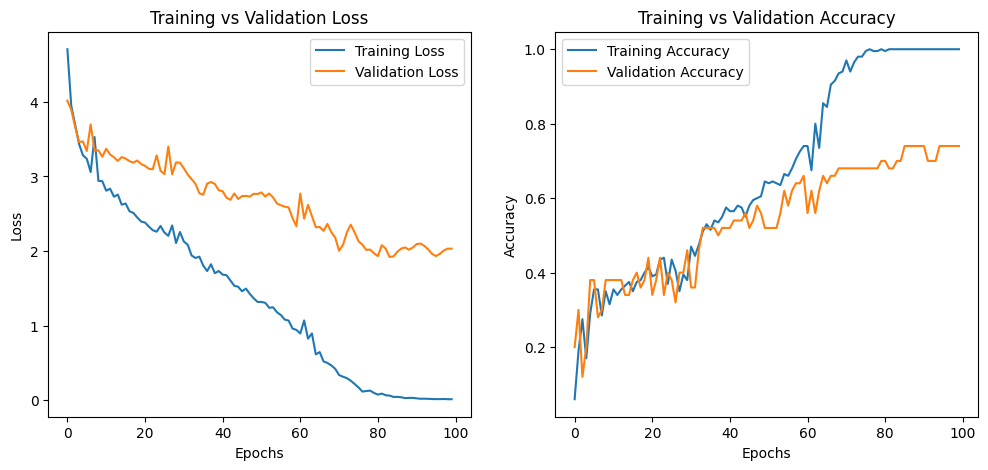

In [112]:
# 🔹 Plot Training vs Validation Loss & Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

Analisis:
- Training Loss turun secara konsisten seiring bertambahnya epoch, menunjukkan bahwa model semakin baik dalam menyesuaikan data pelatihan.
- Validation Loss cenderung fluktuatif dan lebih tinggi dibandingkan Training Loss, yang bisa mengindikasikan overfitting setelah sekitar epoch ke-50. Overfitting terjadi ketika model terlalu menyesuaikan diri dengan data pelatihan dan kurang mampu menggeneralisasi pada data baru.


Analisis:
- Training Accuracy meningkat secara signifikan, mencapai hampir 100%, yang menunjukkan bahwa model telah belajar dengan baik dari data pelatihan.
- Validation Accuracy juga meningkat tetapi lebih fluktuatif, dan setelah epoch 60, peningkatannya melambat dan tampak stabil di sekitar 70%-75%.
- Kesalahan potensial: Jika ada kesenjangan yang terlalu besar antara Training Accuracy dan Validation Accuracy, ini menunjukkan overfitting.

Kesimpulan

- Model mengalami overfitting, karena perbedaan yang cukup besar antara akurasi pelatihan dan validasi serta validation loss yang cenderung stabil atau meningkat setelah beberapa epoch.

- Transformer sangat efektif dalam tugas penerjemahan dibandingkan model encoder-decoder berbasis LSTM.

- Dengan menggunakan Multi-Head Attention, model ini dapat menangkap konteks yang lebih luas.

- Implementasi Transformer cocok untuk tugas NLP yang membutuhkan pemrosesan teks panjang dan kompleks.

- Model dapat dikembangkan lebih lanjut dengan dataset lebih besar dan fine-tuning parameter.

